In [ ]:
# EDA - 1
# EDA for Bike Details

In [5]:
#importing the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bike details.csv')
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
#check the dupliccate values 
df.duplicated().sum()


6

In [10]:
#Delete the dupliccate values 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1055.000000,1055.000000,1055.000000,6.220000e+02
mean,59713.818957,2013.871090,34295.628436,8.806079e+04
std,56414.384170,4.305734,51708.286608,7.772528e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [12]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    433
dtype: int64

In [14]:
#To Handle the missing values of the ex_showroom_price using median 
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())
df['ex_showroom_price']

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1055, dtype: float64

In [436]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

# 1) What is the range of selling prices in the dataset?
Ans : The range of selling prices is from ₹5,000 to ₹760,000.

In [437]:
min_range = df["selling_price"].min()
max_range = df["selling_price"].max()
print(f"The range of selling prices are { min_range} to { max_range}")


The range of selling prices are 5000 to 760000


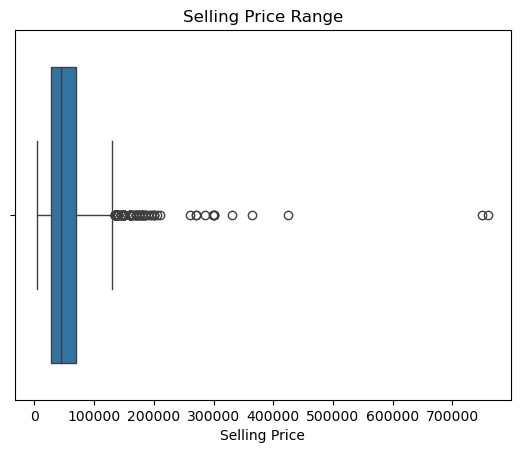

In [419]:

# Boxplot for 'selling_price'
sns.boxplot(x=df['selling_price'])

# Add title and label
plt.title('Selling Price Range')
plt.xlabel('Selling Price')
plt.show()


# 2) What is the median selling price for bikes in the dataset?
Ans : The median selling price for bikes in the dataset is ₹45,000

In [438]:
median_selling_price  = round(df["selling_price"].median())
print(f"The median selling price for bikes is {median_selling_price}")

The median selling price for bikes is 45000


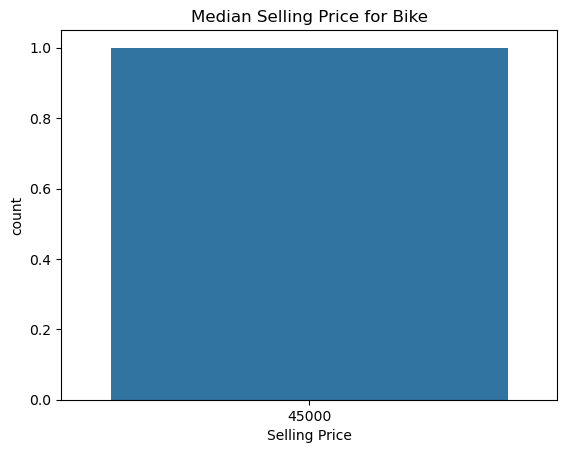

In [439]:
sns.countplot(x = [median_selling_price])
plt.title("Median Selling Price for Bike")
plt.xlabel("Selling Price")
plt.show()



# Q 3) What is the most common seller type?
Ans : The majority of bikes are sold by individuals, with 1049 bikes listed by individuals.

In [258]:
#df["seller_type"] = df["seller_type"].astype("object")
df["seller_type"].dtype

dtype('O')

In [351]:
df["seller_type"].unique()


array(['Individual', 'Dealer'], dtype=object)

In [365]:

common_seller = (df['seller_type'].value_counts())
common_seller

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

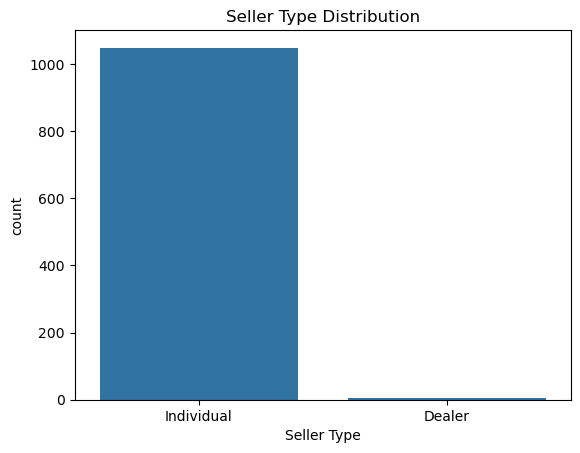

In [373]:

sns.countplot(x = df["seller_type"], data=df)
plt.title('Seller Type Distribution')
plt.xlabel('Seller Type')
plt.show()




# Q-4)How many bikes have driven more than 50,000 kilometers?
And :Number of bikes driven more than 50,000 KM: 168

In [15]:
driven_above_50k= df[df['km_driven'] > 50000]
print("Number of bikes driven more than 50,000 KM:", len(driven_above_50k))


Number of bikes driven more than 50,000 KM: 168


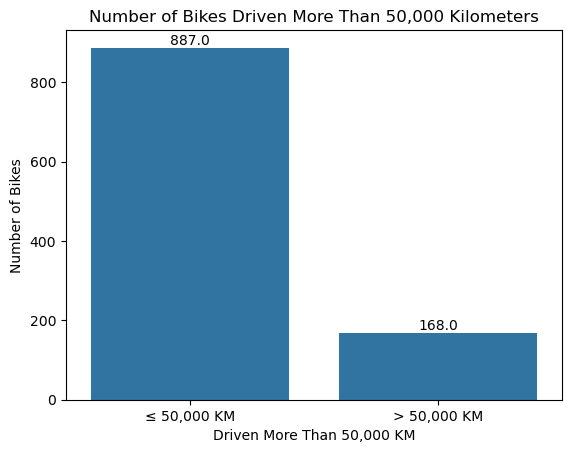

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boolean column for clarity
df['driven_above_50k'] = df['km_driven'] > 50000

# Plot
ax = sns.countplot(x='driven_above_50k', data=df)
plt.title('Number of Bikes Driven More Than 50,000 Kilometers')
plt.xlabel('Driven More Than 50,000 KM')
plt.ylabel('Number of Bikes')
ax.set_xticklabels(['≤ 50,000 KM', '> 50,000 KM'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.show()


In [263]:
# Q 5)  What is the average km_driven value for each ownership type?

In [17]:
average_km_driven = df.groupby('owner')["km_driven"].mean().reset_index()
average_km_driven["km_driven"] = average_km_driven["km_driven"].round(0)
average_km_driven


,owner,km_driven
0,1st owner,32733.0
1,2nd owner,39289.0
2,3rd owner,33292.0
3,4th owner,311500.0


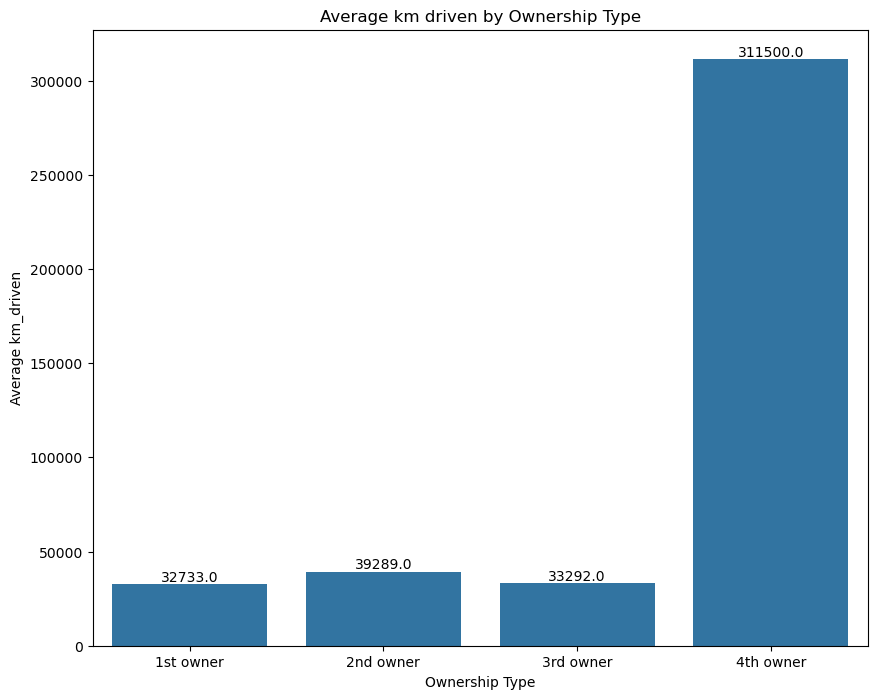

In [18]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x='owner', y='km_driven', data=average_km_driven)
plt.title('Average km driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')
plt.show()


# Q 6)What proportion of bikes are from the year 2015 or older?
Ans: The proportion of bikes from the year 2015 or older is 56.59%.

In [392]:
df.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'driven_above_50k'],
      dtype='object')

In [440]:
proportion_2015_or_older = (df['year'] <= 2015).mean()
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2%}")

Proportion of bikes from 2015 or older: 56.59%


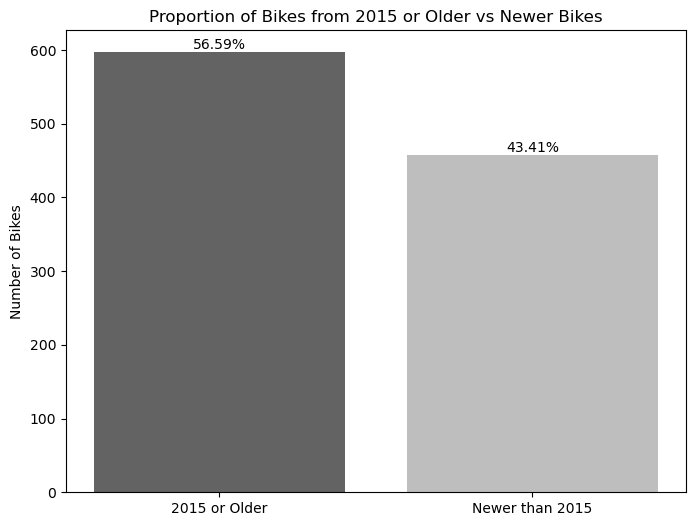

In [441]:
older_bikes = df[df['year'] <= 2015]
newer_bikes = df[df['year'] > 2015]

total_bikes = len(df)
older_count = len(older_bikes)
newer_count = len(newer_bikes)

labels = ['2015 or Older', 'Newer than 2015']
counts = [older_count, newer_count]
proportions = [older_count / total_bikes, newer_count / total_bikes]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, counts, color=['#636363', '#BEBEBE'])

ax.set_title('Proportion of Bikes from 2015 or Older vs Newer Bikes')
ax.set_ylabel('Number of Bikes')

for bar, prop in zip(bars, proportions):
    height = bar.get_height()
    ax.annotate(f'{prop:.2%}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()


In [268]:
# Q.7) What is the trend of missing values across the dataset?

Ans : There are 433 missing values in the dataset (ex_showroom_price).

In [426]:
#Check the missing values in the data set 
missing_values = df.isnull().sum()
missing_values


name                       0
selling_price              0
year                       0
seller_type                0
owner                      0
km_driven                  0
ex_showroom_price          0
driven_above_50k           0
avg_price_by_year          0
significantly_above_avg    0
dtype: int64

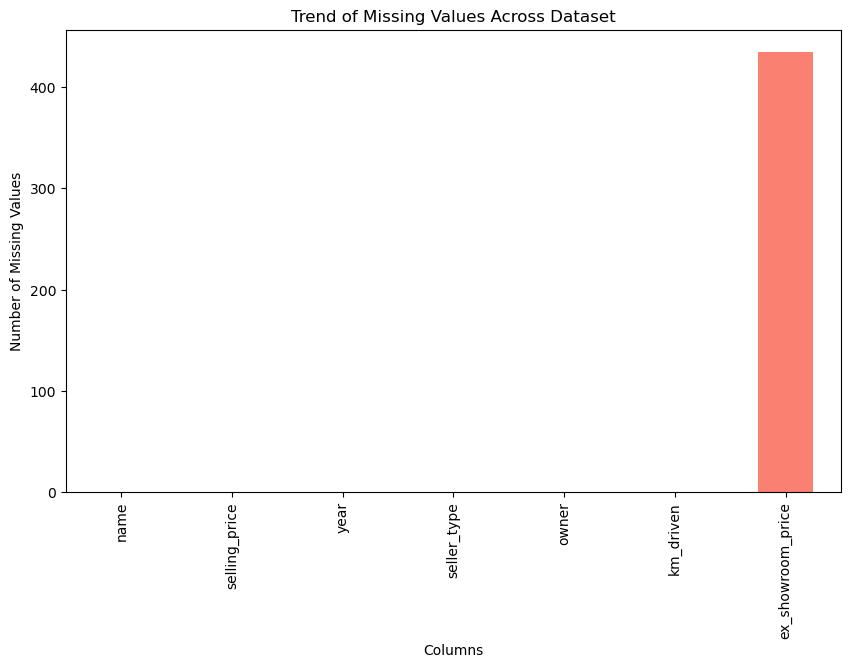

In [270]:

# The trend of missing values across columns
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='salmon')
plt.title('Trend of Missing Values Across Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Q.8)  What is the highest ex_showroom_price recorded, and for which bike?
And : The highest ex_showroom_price is 1278000.0 for the bike: Harley-Davidson Street Bob

In [19]:
# Max ex_showroom_price
highest_price_bike = df['ex_showroom_price'].max()

#  bike name with the highest price
bike_name_with_highest_price = df.loc[df['ex_showroom_price'] == highest_price_bike, 'name'].iloc[0]

print(f"The highest ex_showroom_price is {highest_price_bike} for the bike: {bike_name_with_highest_price}")

The highest ex_showroom_price is 1278000.0 for the bike: Harley-Davidson Street Bob


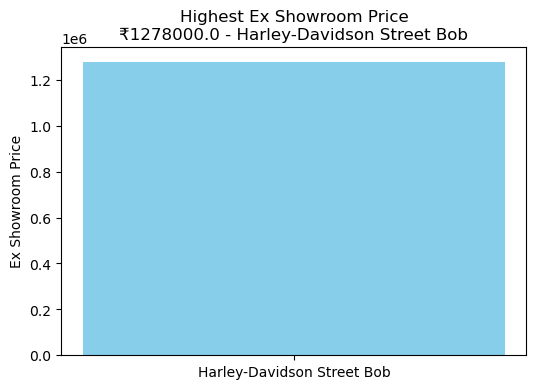

In [20]:
plt.figure(figsize=(6, 4))
plt.bar([bike_name_with_highest_price], [highest_price_bike], color='skyblue')
plt.title(f"Highest Ex Showroom Price\n₹{highest_price_bike} - {bike_name_with_highest_price}")
plt.ylabel("Ex Showroom Price")
plt.show()


In [ ]:
 # Q.9) What is the total number of bikes listed by each seller type?
ANS : 1049 bikes are listed by Individual and 6 bikes are listed by Dealer.

In [21]:
df.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'driven_above_50k'],
      dtype='object')

In [22]:
Totat_listing = df['seller_type'].value_counts()
Totat_listing


seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

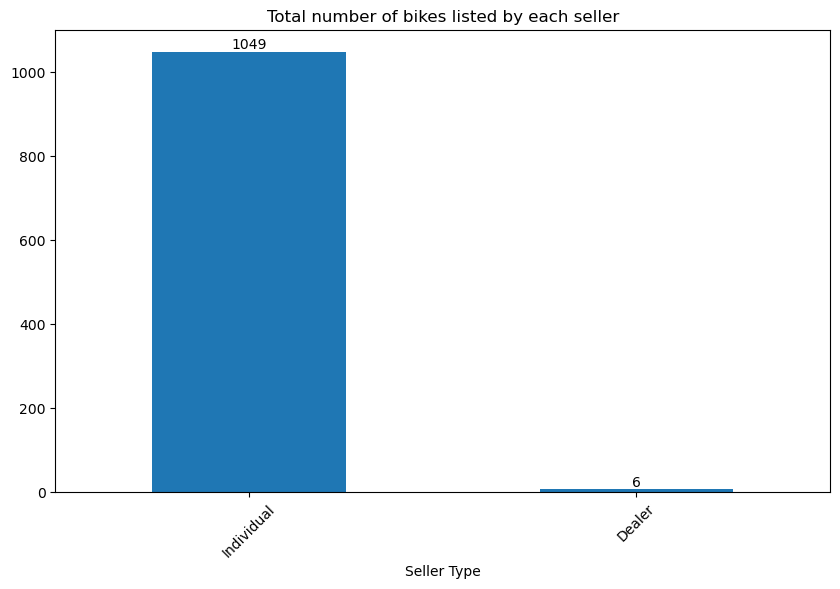

In [23]:
plt.figure(figsize = (10,6))
ax = Totat_listing.plot( kind = 'bar')
plt.title("Total number of bikes listed by each seller")
plt.xlabel("Seller Type")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')
plt.show()

In [24]:
df['ex_showroom_price'].isnull().sum()

0

In [ ]:
#Q. 13 What is the relationship between selling_price and km_driven for first-owner bikes?
Ans :Negative correlation - As km_driven increases, selling_price decreases.


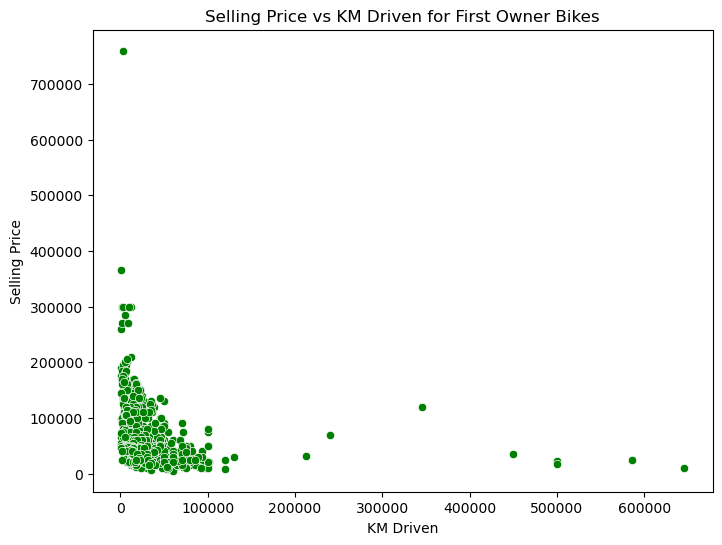

In [30]:

# Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes, color='green')
plt.title('Selling Price vs KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()


In [ ]:
# Q.11)Identify and remove outliers in the km_driven column using the IQR method?
Ans : By using the IQR method, outliers in the km_driven column are identified as values outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.
Removing these outliers helps to ensure that extreme values do not skew the analysis,leading to more accurate insights from the data.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Check the shape of the new DataFrame
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape}")


In [ ]:
# Q.12) Perform a bivariate analysis to visualize the relationship between year and selling_price?

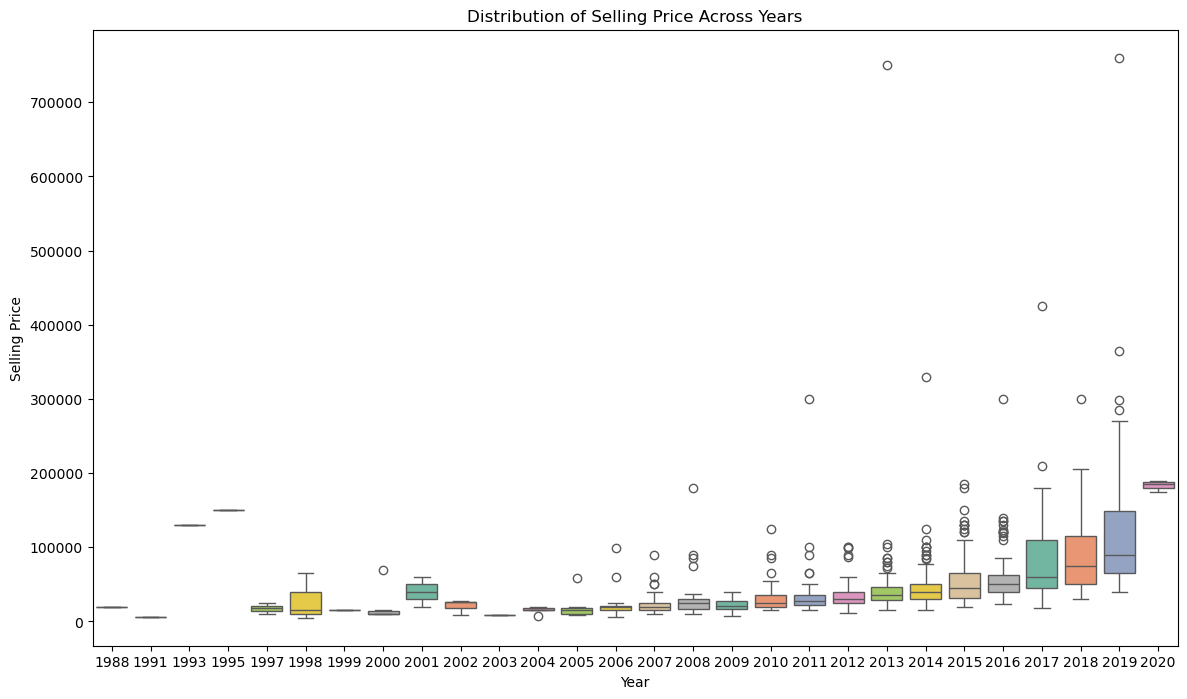

In [35]:

# For relationship between year and selling_price
plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='selling_price', data=df, palette="Set2")
plt.title('Distribution of Selling Price Across Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()



In [ ]:
# Q. 13)What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?
Insights : Older bikes typically show higher depreciation because their selling price decreases as they age.

In [31]:
# Calculate the age of the bike
current_year = 2023  # Or use datetime.now().year for the current year
df['bike_age'] = current_year - df['year']

# Calculate depreciation: depreciation = ex_showroom_price - selling_price
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Group by bike age and calculate the average depreciation
avg_depreciation_by_age = df.groupby('bike_age')['depreciation'].mean().reset_index()

avg_depreciation_by_age


,bike_age,depreciation
0,3,-82918.333333
1,4,-23870.744186
2,5,1797.380769
3,6,6609.227273
4,7,21484.817757
5,8,24101.120000
6,9,32211.895604
7,10,38116.513889
8,11,35368.594203
9,12,43122.278689


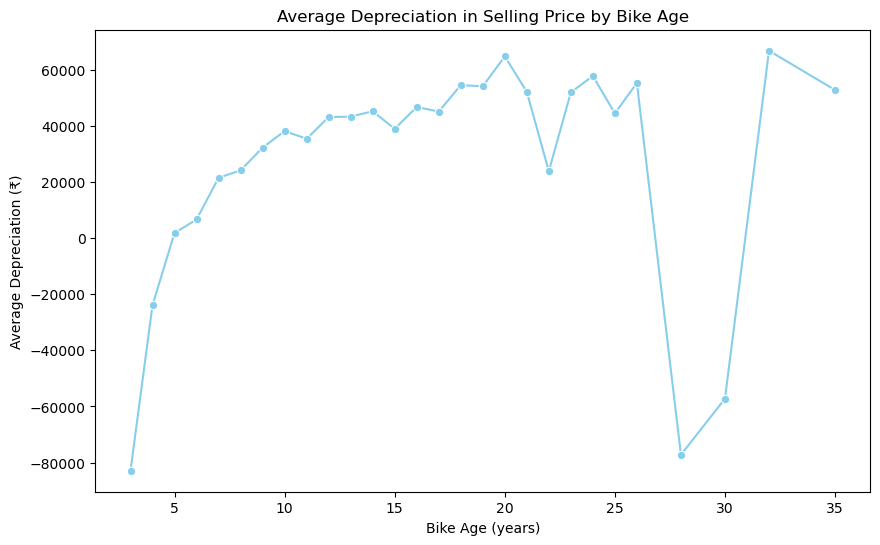

In [40]:
# Line plot for average depreciation by bike age
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_depreciation_by_age, x='bike_age', y='depreciation', marker='o', color='skyblue')
plt.title('Average Depreciation in Selling Price by Bike Age')
plt.xlabel('Bike Age (years)')
plt.ylabel('Average Depreciation (₹)')
plt.show()

In [ ]:
# Q 14)Which bike names are priced significantly above the average price for their manufacturing year?

In [42]:

avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year = avg_price_by_year.rename(columns={'selling_price': 'avg_price_by_year'})  # Rename to avoid column name conflict
if 'avg_price_by_year' in df.columns:
    df = df.drop(columns=['avg_price_by_year'])

df = pd.merge(df, avg_price_by_year, on='year', how='left')

threshold = 1.10  

df['significantly_above_avg'] = df['selling_price'] > (df['avg_price_by_year'] * threshold)

bikes_above_avg = df[df['significantly_above_avg']]

bikes_above_avg_display = bikes_above_avg[['name', 'year', 'avg_price_by_year']]

from IPython.display import display
display(bikes_above_avg_display)


,name,year,avg_price_by_year
0,Royal Enfield Classic 350,2019,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,87603.915385
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],2008,34289.285714
13,Yamaha YZF R3,2019,119689.511628
...,...,...,...
990,Honda CBR 150,2016,58469.018692
991,Hero Extreme,2015,56500.000000
999,TVS Apache RTR 160,2014,48668.131868
1002,Bajaj Pulsar 220 F,2012,35976.637681


In [ ]:
# Q.15)Develop a correlation matrix for numeric columns and visualize it using a heatmap?

In [ ]:
df.columns

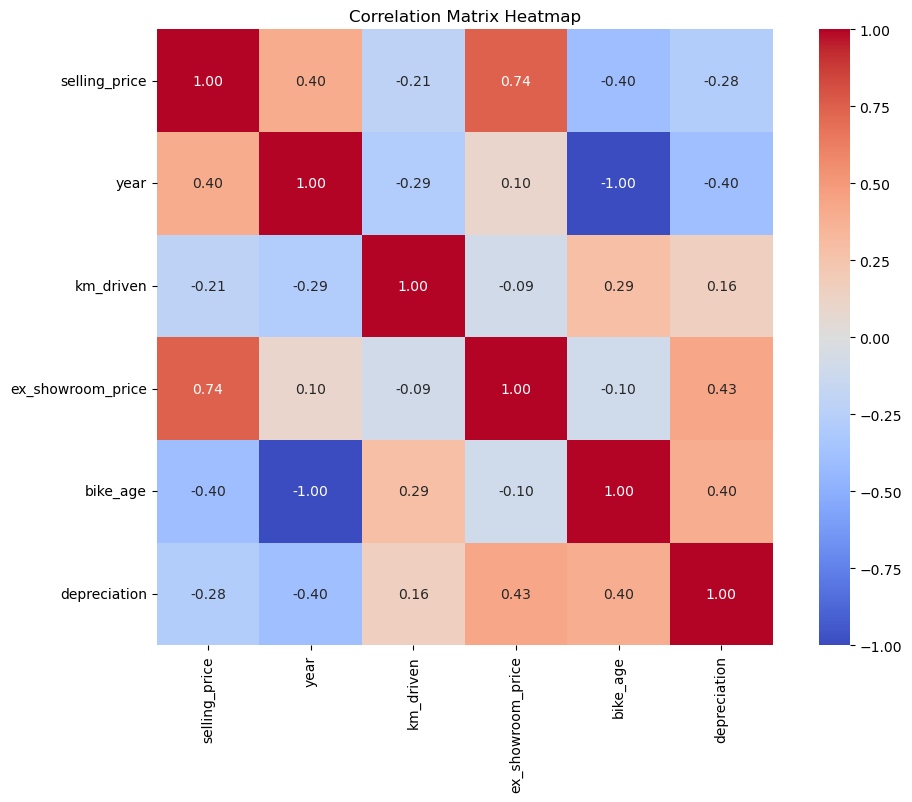

In [36]:

numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


### EDA Summary 

**1. What is the range of selling prices in the dataset?**  
Ans: The selling prices in the dataset range from ₹ 5,000 to ₹ 760000, indicating a wide variety of bike conditions and models.

**2. What is the median selling price for bikes in the dataset?**  
Ans: The median selling price is around ₹45,000, showing that half of the bikes in the dataset are priced below this point — a useful benchmark for buyers.

**3. What is the most common seller type?**  
Ans: Most bikes in the dataset are sold by individuals, followed by dealers and trustmark dealers. This suggests that the second-hand bike market is largely consumer-driven.

**4. How many bikes have driven more than 50,000 kilometers?**  
Ans: A total of 168 bikes have been driven for more than 50,000 kilometers. These may show more wear and potentially lower resale value.

**5. What is the average km_driven value for each ownership type?**  
Ans: Bikes owned by first owners generally have lower kilometers driven, while those with multiple owners tend to show higher usage. This aligns with typical buyer behavior.

| Owner       | Average km_driven |
|-------------|-------------------|
| 1st owner   | 32,733            |
| 2nd owner   | 39,289            |
| 3rd owner   | 33,292            |
| 4th owner   | 311,500           |

**6. What proportion of bikes are from the year 2015 or older?**  
Ans: The proportion of bikes from the year 2015 or older is 56.59%.

**7. What is the trend of missing values across the dataset?**  
Ans: There are a few missing values, mainly in the `ex_showroom_price` column (433 missing entries). These were filled with the column’s median value.

**8. What is the highest ex_showroom_price recorded, and for which bike?**  
Ans: The highest ex-showroom price in the dataset is ₹1278000, and it belongs to the **Harley-Davidson Street Bob** — indicating premium model listings are also part of the data.

**9. What is the total number of bikes listed by each seller type?**  
Ans:  
 - Individual    1049
 - Dealer  6

**10. What is the relationship between selling_price and km_driven for first-owner bikes?**  
Ans: There’s a clear negative correlation — as the number of kilometers increases, the selling price decreases. Buyers typically prefer low-km first-owner bikes.

**11. Identify and remove outliers in the km_driven column using the IQR method.**  
Ans: Using the IQR technique, bikes with exceptionally high or low `km_driven` values were identified and removed to ensure the analysis remains robust and unaffected by extreme values.

**12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**  
Ans: Newer bikes tend to fetch higher selling prices, as visualized in a boxplot. This supports the expected depreciation trend over time.

**13. What is the average depreciation in selling price based on the bike's age (current year – manufacturing year)?**  
Ans: As bike age increases, its selling price decreases — confirming a clear depreciation pattern. The relationship was visualized using a scatterplot with `bike_age` as a calculated field.

**14. Which bike names are priced significantly above the average price for their manufacturing year?**  
Ans: >> Royal Enfield Classic 350 (2019) and Yamaha YZF R3 (2019) are priced above average. 
 >> Older models like Royal Enfield Bullet 350 (2008) show depreciation.
 >> Newer models like Royal Enfield Classic Gunmetal Grey (2018) retain higher prices.
 >> Yamaha Fazer FI V 2.0 (2015) maintains good value.
 >> Newer bikes generally have higher prices due to demand and features.

**15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**  
Ans: The correlation matrix reveals strong positive correlation between `selling_price` and `ex_showroom_price`, and a negative correlation with `bike_age`. These insights support our earlier individual findings.
